# Image Basics

Images are stored as `numpy` multidimensional arrays.  This will definitely come in
handy and avoid the need to mess about directly with the images.
Renaming the imports seems to be a thing. 
At least for `numpy` being renamed to `np`.

## Loading Images


`skimage.io.imread()` uses `iio.imread()`

In [37]:
%%time
%matplotlib widget


import imageio.v3 as iio
import numpy as np

eight = iio.imread(uri='../data/raw/training/eight.tif')
assert isinstance(eight, np.ndarray)

print(eight.shape)
print(eight)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
CPU times: user 1.99 ms, sys: 1.28 ms, total: 3.27 ms
Wall time: 3.3 ms


See that the coordinates are height then width.
left-hand coordinate system.
Also the image is just ones and zeros.

Display the image with `pyplot`.  Why are t

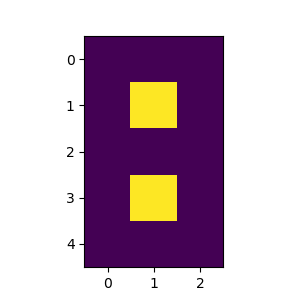

In [29]:
from matplotlib import pyplot

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(eight)

## Working with Pixels

Let's look at the pixels in the image.
Edit the image.
Then show it with the other one.

(-0.5, 2.5, 4.5, -0.5)

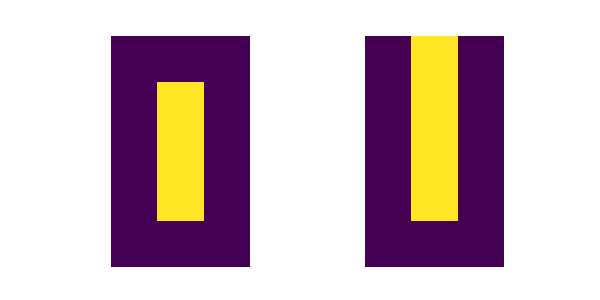

In [31]:
import copy

other_figure, other_axes = pyplot.subplot_mosaic([
    ['left', 'right']
], figsize=(6, 3))

zero = copy.deepcopy(eight)
zero[2,1] = 1.0
other_axes['left'].imshow(zero)
other_axes['left'].axis('off')  # Hide the axes

letter_u = copy.deepcopy(eight)
letter_u[0:4, 1] = 2.0
other_axes['right'].imshow(letter_u)
other_axes['right'].axis('off')  # Hide the axes

## More Colours

256 colours

In [33]:
three_colour_eight = copy.deepcopy(eight)
three_colour_eight = three_colour_eight * 128
three_colour_eight[2, :] = 255
print(three_colour_eight)

[[  0.   0.   0.]
 [  0. 128.   0.]
 [255. 255. 255.]
 [  0. 128.   0.]
 [  0.   0.   0.]]


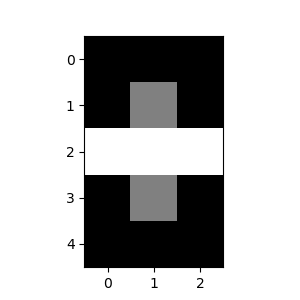

In [35]:
yet_another_figure, yet_another_axes = pyplot.subplots(figsize=(3,3))
yet_another_axes.imshow(three_colour_eight, cmap=pyplot.cm.gray)

## Even More Colours



[[[102 179  92]
  [ 14 106  71]
  [188  20 102]
  [121 210 214]]

 [[ 74 202  87]
  [116  99 103]
  [151 130 149]
  [ 52   1  87]]

 [[235 157  37]
  [129 191 187]
  [ 20 160 203]
  [ 57  21 252]]

 [[235  88  48]
  [218  58 254]
  [169 219 187]
  [207  14 189]]]


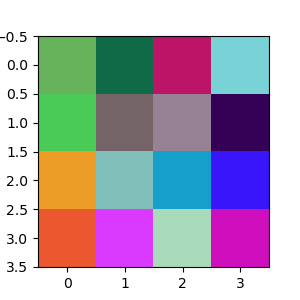

In [41]:
import numpy as np

pseudo_random = np.random.RandomState(seed=42)
checker_board = pseudo_random.randint(0, 255, size=(4,4,3))
print(checker_board)

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(checker_board)
